# Exercicios KNN - Exercicio 2

Usando a base de dados Boston, ajustar um modelo de classificação k-vizinhos 
mais próximos, para prever se um determinado subúrbio possui uma taxa de crime (crim) acima 
ou  abaixo  do  terceiro  quartil.  Utilize  todas  as  variáveis  existentes.  Dica:  use  a  função 
quantile(x, 0.75) para encontrar o 3º quartil.

### Grupo

- Gabriel D. Padua RA 200749
- Rafael Prestes RA 200779 
- Thomas Elinton RA 130531
- Gabriela Fontolan RA 200645
- Náthali Yukari RA 200145 

In [53]:
library(MASS)
library(FNN)

In [7]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [16]:
quantile(Boston$crim, 0.75)

75% 
3.677083

In [22]:
crimQuantile <- rep(0, nrow(Boston))

In [24]:
crimQuantile[Boston$crim > quantile(Boston$crim, 0.75)] <- 1

In [25]:
Boston2 <- data.frame(Boston, crimQuantile)

In [27]:
head(Boston2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crimQuantile
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0


In [28]:
set.seed(218)

In [29]:
nrow(Boston2)

[1] 506

## Separando a base de dados de treino

In [30]:
index <- sample(1:nrow(Boston2), nrow(Boston2) * 0.70)

In [47]:
train.x <- Boston2[index,]

In [48]:
train.y <- Boston2[index, c('crimQuantile')]

## Separando a base de dados de teste

In [50]:
test.x <- Boston2[-index,]

In [55]:
test.y <- Boston2[-index, c('crimQuantile')]

## Rodando o KNN - 100 iterações

In [56]:
k <- 100
acurancy <- c('numeric', k);
precision <- c('numeric', k);
sensibility <- c('numeric', k);
f1score <- c('numeric', k);
especiality <- c('numeric', k);


for (i in 1:k) {
    knn.previsto <- knn(train.x, test.x, train.y, i);
    confusion <- table(test.y, knn.previsto);
    
    trueNegative <- confusion[1, 1];
    truePositive <- confusion[2, 2];
    falseNegative <- confusion[2, 1];
    falsePositive <- confusion[1, 2];
    
    acurancy[i] <- (trueNegative + truePositive) / (trueNegative + truePositive + falseNegative + falsePositive);
    precision[i] <- truePositive / (falsePositive + truePositive);
    sensibility[i] <- truePositive / (falseNegative + truePositive);
    especiality[i] <- trueNegative / (trueNegative + falsePositive);
    f1score[i] <- 2 * truePositive / (2*truePositive + falsePositive + falseNegative); 
}

## Gráfico de acuracia

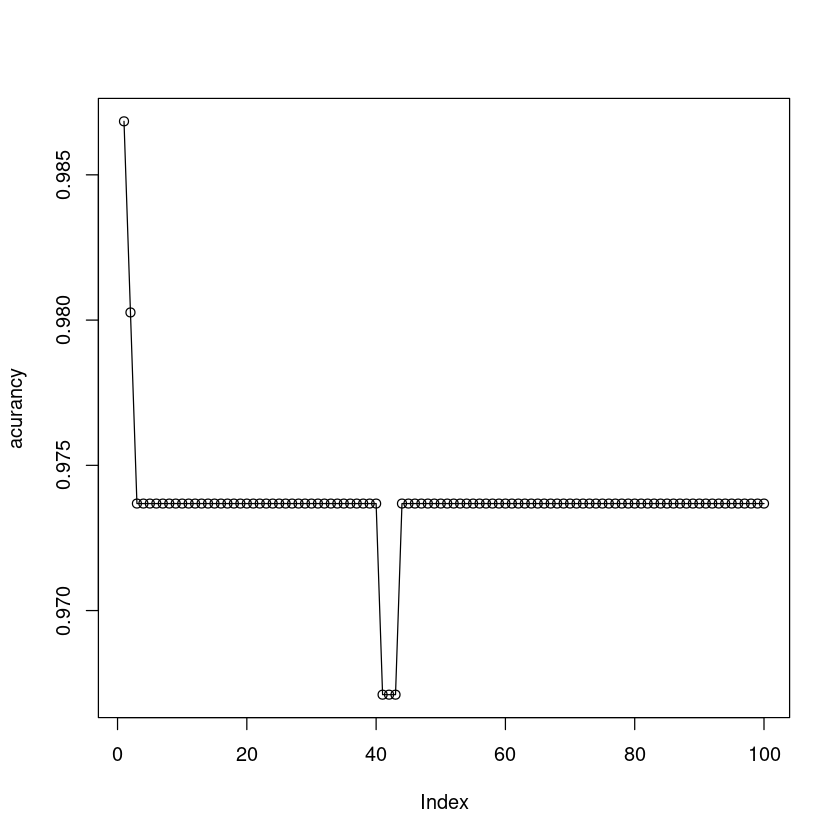

In [57]:
plot(acurancy, type='o')

### Modelo com maior Acuracia

In [58]:
max(which(acurancy==max(acurancy)))

[1] 1

## Gráfico de precisão

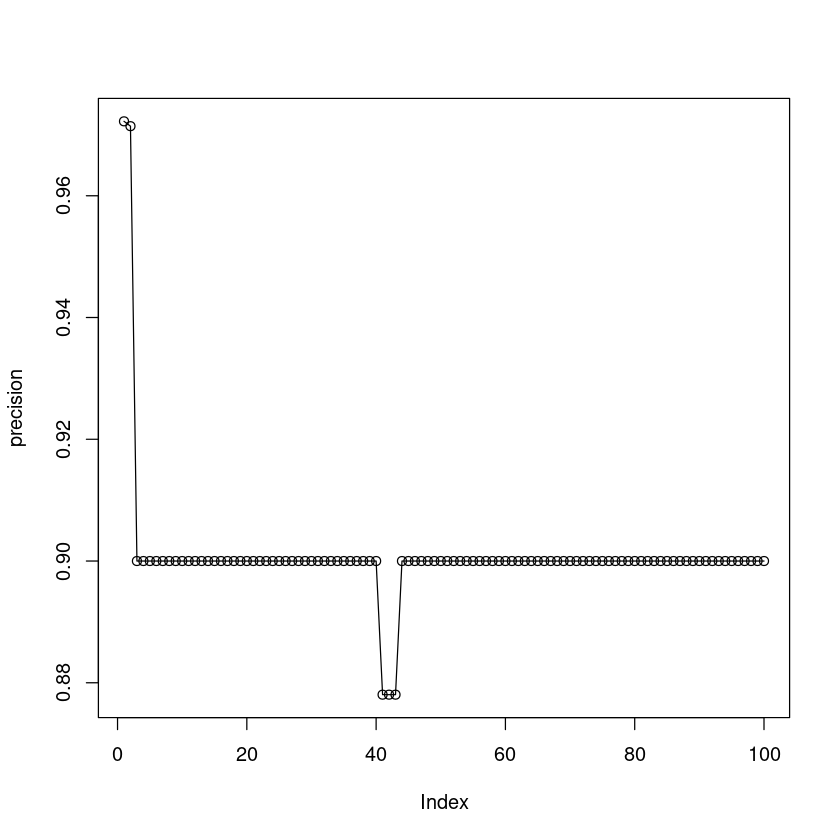

In [59]:
plot(precision, type='o')

### Modelo com maior precisão

In [60]:
max(which(precision==max(precision))) 

[1] 1

## Gráfico da sensibilidade

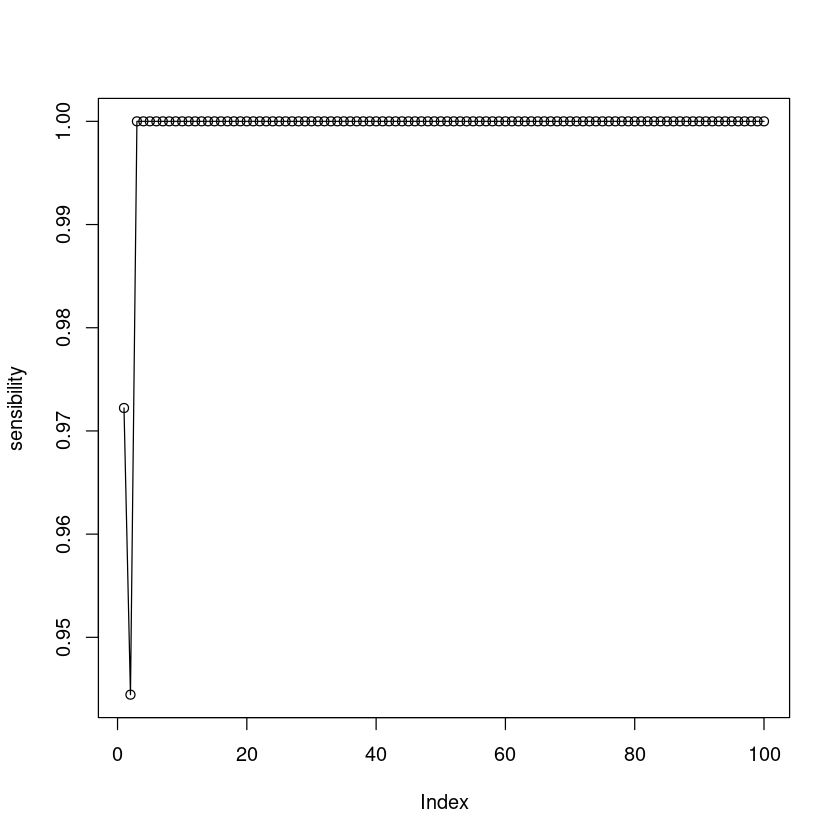

In [61]:
plot(sensibility, type='o')

### Modelo com menor sensibilidade

In [70]:
min(which(sensibility==min(sensibility)))

[1] 2

### Modelo com maior sensibilidade

In [62]:
max(which(sensibility==max(sensibility)))

[1] 100

## Gráfico F1 Score

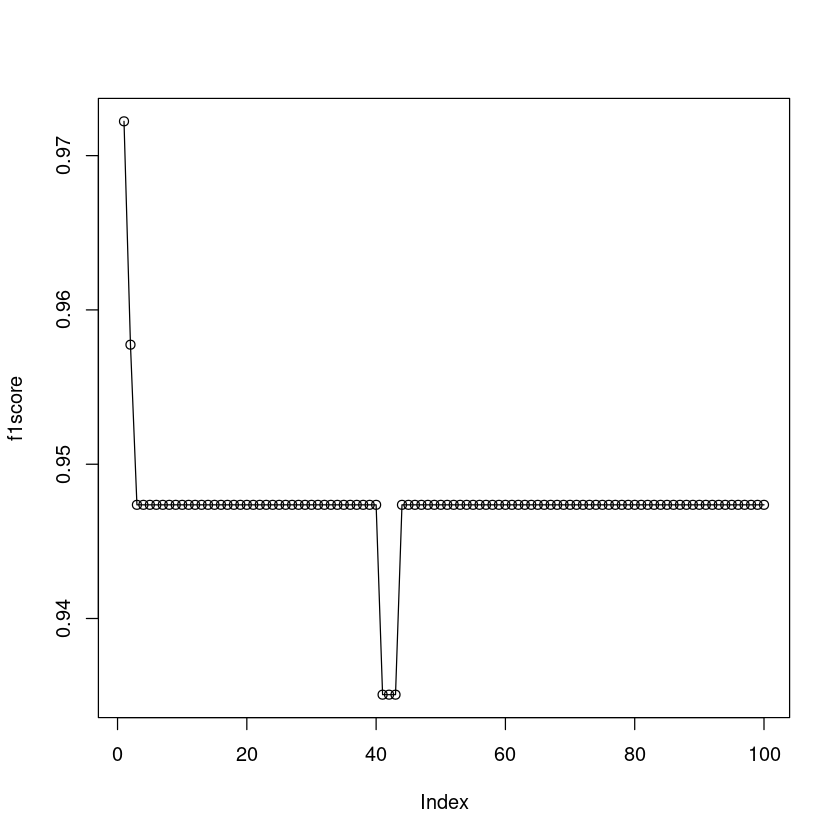

In [64]:
plot(f1score, type='o');

### Modelo com maior F1 Score

In [65]:
max(which(f1score==max(f1score)))

[1] 1

## Gráfico de especialidade

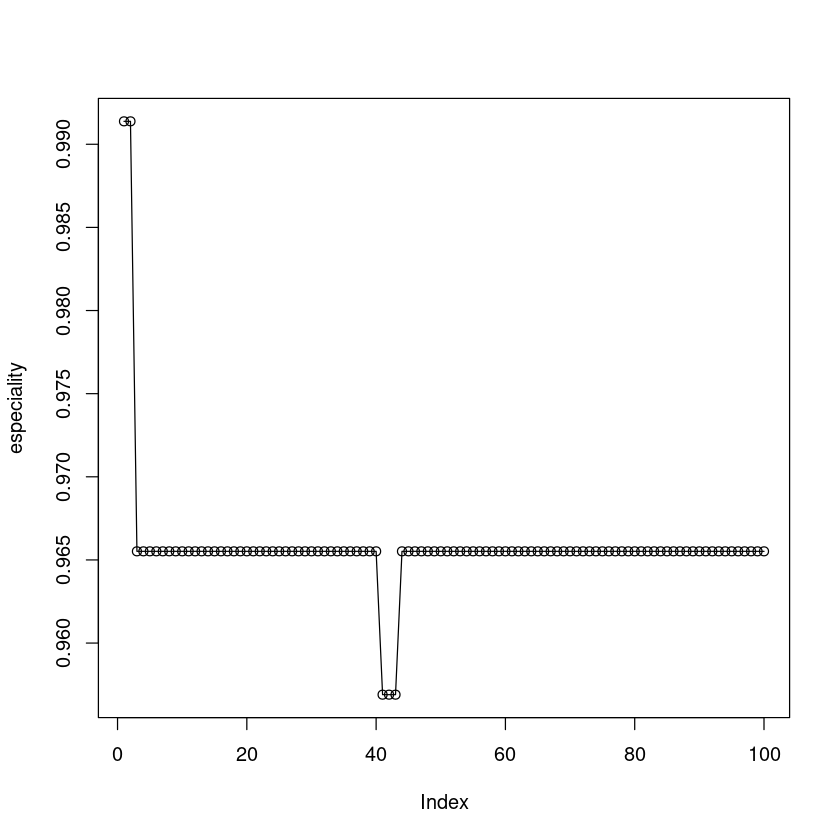

In [66]:
plot(especiality, type='o')

### Modelo com maior especialidade

In [67]:
max(which(especiality==max(especiality)))

[1] 2

## Valor de k com a melhor perfomance

Analisando os erros obtidos com cada cada em um intervalo de 1 até 100, pode se dizer que o k com melhor perfomance e o k1.